In [1]:
!pip install --upgrade tapi-yandex-metrika==2022.4.8

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tapi-yandex-metrika: filename=tapi_yandex_metrika-2022.4.8-py3-none-any.whl size=10703 sha256=cb0d24bd1ad58c8c5b09d4631576bc9ca33390344ca0e66a4f8c1660c3bf6248
  Stored in directory: /root/.cache/pip/wheels/87/b6/09/0e9107d45f3e0b7c4cc1528e356d0f43a4a1710e30b236d8c8
  Created wheel for tapi-wrapper2: filename=tapi_wrapper2-0.1.3-py3-none-any.whl size=8863 sha256=14e6fc8058beb636a5d88ec8e174545cd15275b1eb939e7d91148918080f8ad5
  Stored in directory: /root/.cache/pip/wheels/7a/7c/22/268d01f82660009ba3709ff46ebe574a9f95a427d54711d002
Successfully built tapi-yandex-metrika tapi-wrapper2


In [17]:
#API отчетов, уникальные пользователи по дате
import datetime as dt
from tapi_yandex_metrika import YandexMetrikaStats
import pandas as pd
import matplotlib.pyplot as plt

ACCESS_TOKEN = 'y0_AgAAAABx_Z5qAAwiSQAAAAELJSlEAAA43bRqyixGG5VuK_l7R9KM2IAcZw'
COUNTER_ID = '45198306'

client = YandexMetrikaStats(access_token=ACCESS_TOKEN)

params = dict(
    ids = COUNTER_ID,
    date1 = '2024-05-01',
    date2 = '2024-06-30',
    metrics = 'ym:s:users',
    dimensions = 'ym:s:date',
    sort = 'ym:s:date',
    lang = 'ru',
)

report = client.stats().get(params=params)

In [7]:
print(report.data)

{'query': {'ids': [45198306], 'dimensions': ['ym:s:date'], 'metrics': ['ym:s:users'], 'sort': ['ym:s:date'], 'date1': '2024-05-01', 'date2': '2024-06-30', 'limit': 100, 'offset': 1, 'group': 'Week', 'benchmarks_version': '1720396800000', 'auto_group_size': '1', 'attr_name': '', 'quantile': '50', 'offline_window': '21', 'attribution': 'LastSign', 'currency': 'RUB', 'funnel_window': '', 'adfox_event_id': '0', 'funnel_pattern': ''}, 'data': [{'dimensions': [{'name': '2024-05-01'}], 'metrics': [5887.0]}, {'dimensions': [{'name': '2024-05-02'}], 'metrics': [5619.0]}, {'dimensions': [{'name': '2024-05-03'}], 'metrics': [5042.0]}, {'dimensions': [{'name': '2024-05-04'}], 'metrics': [5576.0]}, {'dimensions': [{'name': '2024-05-05'}], 'metrics': [5460.0]}, {'dimensions': [{'name': '2024-05-06'}], 'metrics': [5564.0]}, {'dimensions': [{'name': '2024-05-07'}], 'metrics': [5680.0]}, {'dimensions': [{'name': '2024-05-08'}], 'metrics': [4566.0]}, {'dimensions': [{'name': '2024-05-09'}], 'metrics': [

In [8]:
print(report.columns)

['ym:s:date', 'ym:s:users']


In [12]:
result = report().to_values()

In [11]:
type (result)

list

In [14]:
df = pd.DataFrame(result, columns=['ym:s:date', 'ym:s:users'])

In [15]:
df

,ym:s:date,ym:s:users
0,2024-05-01,5887.0
1,2024-05-02,5619.0
2,2024-05-03,5042.0
3,2024-05-04,5576.0
4,2024-05-05,5460.0
...,...,...
56,2024-06-26,6842.0
57,2024-06-27,7325.0
58,2024-06-28,6807.0
59,2024-06-29,6967.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ym:s:users'].plot(kind='hist', bins=20, title='ym:s:users')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='ym:s:users', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ym:s:users']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ym:s:users')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ym:s:date']
  ys = series['ym:s:users']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('ym:s:date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ym:s:date')
_ = plt.ylabel('ym:s:users')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ym:s:date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ym:s:date'}, axis=1)
              .sort_values('ym:s:date', ascending=True))
  xs = counted['ym:s:date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('ym:s:date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ym:s:date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['ym:s:users'].plot(kind='line', figsize=(8, 4), title='ym:s:users')
plt.gca().spines[['top', 'right']].set_visible(False)

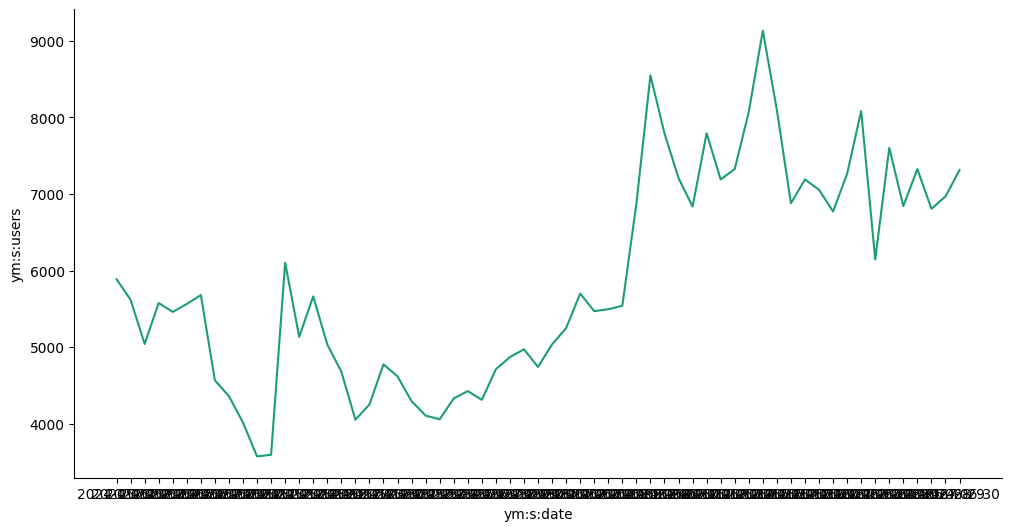

In [19]:
# @title ym:s:date vs ym:s:users

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ym:s:date']
  ys = series['ym:s:users']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ym:s:date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ym:s:date')
_ = plt.ylabel('ym:s:users')

In [18]:
print(df)

     ym:s:date  ym:s:users
0   2024-05-01      5887.0
1   2024-05-02      5619.0
2   2024-05-03      5042.0
3   2024-05-04      5576.0
4   2024-05-05      5460.0
..         ...         ...
56  2024-06-26      6842.0
57  2024-06-27      7325.0
58  2024-06-28      6807.0
59  2024-06-29      6967.0
60  2024-06-30      7312.0

[61 rows x 2 columns]


In [20]:
#API отчетов, источники сводка
import datetime as dt
from tapi_yandex_metrika import YandexMetrikaStats
import pandas as pd
import matplotlib.pyplot as plt

ACCESS_TOKEN = 'y0_AgAAAABx_Z5qAAwiSQAAAAELJSlEAAA43bRqyixGG5VuK_l7R9KM2IAcZw'
COUNTER_ID = '45198306'

client = YandexMetrikaStats(access_token=ACCESS_TOKEN)

params = dict(
    ids = COUNTER_ID,
    date1 = '2024-05-01',
    date2 = '2024-06-30',
    metrics = 'ym:s:visits, ym:s:users, ym:s:bounceRate, ym:s:pageDepth, ym:s:avgVisitDurationSeconds, ym:s:favoriteGoalsReaches',
    dimensions = 'ym:s:lastSignTrafficSource',
    lang = 'ru',
)

report = client.stats().get(params=params)

In [21]:
result2 = report().to_values()

In [22]:
print(report.columns)

['ym:s:lastSignTrafficSource', 'ym:s:visits', 'ym:s:users', 'ym:s:bounceRate', 'ym:s:pageDepth', 'ym:s:avgVisitDurationSeconds', 'ym:s:favoriteGoalsReaches']


In [23]:
df2 = pd.DataFrame(result2, columns=['ym:s:lastSignTrafficSource', 'ym:s:visits', 'ym:s:users', 'ym:s:bounceRate', 'ym:s:pageDepth', 'ym:s:avgVisitDurationSeconds', 'ym:s:favoriteGoalsReaches'])

In [24]:
df2

,ym:s:lastSignTrafficSource,ym:s:visits,ym:s:users,ym:s:bounceRate,ym:s:pageDepth,ym:s:avgVisitDurationSeconds,ym:s:favoriteGoalsReaches
0,Переходы по рекламе,329409.0,163403.0,28.361399,2.858371,110.047248,17744.0
1,Переходы из поисковых систем,80017.0,62836.0,15.832886,3.106490,146.435870,3537.0
2,Прямые заходы,19637.0,14579.0,15.929113,3.359627,161.609920,1026.0
3,Переходы по ссылкам на сайтах,5184.0,2633.0,12.885802,4.374035,221.528356,492.0
4,Переходы с почтовых рассылок,4900.0,2624.0,8.387755,5.738367,257.591633,915.0
5,Переходы из социальных сетей,1614.0,1069.0,13.506815,4.828377,241.115242,159.0
6,Внутренние переходы,1209.0,841.0,17.700579,4.862696,261.106700,177.0
7,Переходы из рекомендательных систем,979.0,521.0,13.789581,3.730337,205.156282,82.0
8,Переходы из мессенджеров,230.0,99.0,17.391304,5.339130,313.217391,24.0


In [25]:
#API отчетов, достижения цели "Оформили заказ"
import datetime as dt
from tapi_yandex_metrika import YandexMetrikaStats
import pandas as pd
import matplotlib.pyplot as plt

ACCESS_TOKEN = 'y0_AgAAAABx_Z5qAAwiSQAAAAELJSlEAAA43bRqyixGG5VuK_l7R9KM2IAcZw'
COUNTER_ID = '45198306'

client = YandexMetrikaStats(access_token=ACCESS_TOKEN)

params = dict(
    ids = COUNTER_ID,
    date1 = '2024-05-01',
    date2 = '2024-06-30',
    metrics = 'ym:s:goal32383992users',
    dimensions = 'ym:s:date',
    lang = 'ru',
)

report = client.stats().get(params=params)

In [26]:
result3 = report().to_values()

In [27]:
print(report.columns)

['ym:s:date', 'ym:s:goal32383992users']


In [29]:
df3 = pd.DataFrame(result3, columns=['ym:s:date', 'ym:s:goal32383992users'])

In [30]:
df3

,ym:s:date,ym:s:goal32383992users
0,2024-05-05,18.0
1,2024-06-18,18.0
2,2024-06-26,18.0
3,2024-06-17,16.0
4,2024-06-30,16.0
...,...,...
56,2024-06-04,5.0
57,2024-05-09,4.0
58,2024-05-12,4.0
59,2024-06-01,4.0


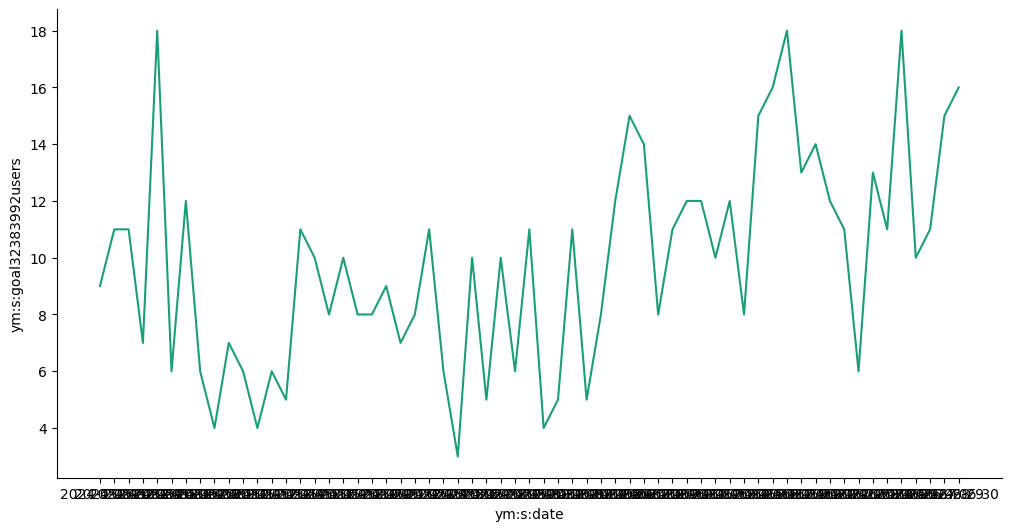

In [31]:
# @title ym:s:date vs ym:s:goal32383992users

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ym:s:date']
  ys = series['ym:s:goal32383992users']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('ym:s:date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ym:s:date')
_ = plt.ylabel('ym:s:goal32383992users')